In [1]:
import json

In [2]:
a = open("english_articles_analysis_results_refined_ne.json","r").read()
data = json.loads(a)

In [3]:
keywords = []
for words in data[0]['keywords']:
    keywords.append(words[0])

In [4]:
keywords_set = set(keywords)

In [8]:
keywords_set

{u"''",
 u"'s",
 u'``',
 u'ads',
 u'begin',
 u'companies',
 u'smoking',
 u'tobacco',
 u'tv',
 u'years'}

In [6]:
named_entities_set = set(named_entities)

In [5]:
named_entities = []
for entities in data[0]['names_entities']:
    named_entities.append(entities.lower())

In [7]:
named_entities_set.intersection(keywords_set)

{u'tobacco', u'tv'}

In [20]:
from matplotlib_venn import venn2
plt.figure()
c=venn2([keywords_set, named_entities_set], set_labels=('Keywords','Named Entities'))

In [27]:
keyphrases = []
for j in data[0]['keyphrases']:
    keyphrases.append(j[0])

In [29]:
keyphrases_set = set(keyphrases)

In [30]:
keywords_set.intersection(keyphrases_set)

{u'ads', u'smoking', u'years'}

In [31]:
keyphrases_set

{u"'' said",
 u"`` 's",
 u"`` n't",
 u'ads',
 u'big tobacco',
 u'federal government',
 u'network tv',
 u'smoking',
 u'tobacco companies',
 u'years'}

In [15]:
from matplotlib import pyplot as plt

In [66]:
keywords = []
keyphrases = []
named_entities = []
for words in data[0]['keywords']:
    keywords.append(words[0])
for words in data[0]['keyphrases']:
    for k in words[0].split():
        keyphrases.append(k)
for words in data[0]['names_entities']:
    named_entities.append(words.lower())

In [49]:
for j in data[0]:
    print j

url
keywords
names_entities
keyphrases


In [14]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2
import json
from matplotlib.backends.backend_pdf import PdfPages

a = open('english_articles_analysis_results_refined_ne.json','r').read()
data = json.loads(a)

with PdfPages('venn_diagrams.pdf') as pdf:
    for article in data:
        keywords = []
        keyphrases = []
        named_entities = []
        for words in article['keywords']:
            keywords.append(words[0])
        for words in article['keyphrases']:
            for k in words[0].split():
                keyphrases.append(k)
        for words in article['names_entities']:
            named_entities.append(words.lower())
    
        keywords_set = set(keywords)
        keyphrases_set = set(keyphrases)
        named_entities_set = set(named_entities)
    
        print "Article:"+article['url']
        
        plt.figure()
        c=venn2([keywords_set,keyphrases_set], set_labels=['Keywords','Keyphrases'], )
        pdf.savefig()
        plt.close()
    
        plt.figure()
        d=venn2([keywords_set,named_entities_set], set_labels=['Keywords','Named Entities'])
        pdf.savefig()
        plt.close()
    
        plt.figure()
        e=venn2([keyphrases_set,named_entities_set], set_labels=['Keyphrases','Named Entities'])
        pdf.savefig()
        plt.close()

Article:http://abcnews.go.com/Health/wireStory/big-tobaccos-anti-smoking-ads-begin-decade-delay-51292806
Article:http://www.wsbtv.com/news/local/cobb-county/teen-stabbed-to-death-at-cobb-county-playground/651106228
Article:http://www.tmz.com/2017/11/19/harrison-ford-helps-woman-crashed-car-off-highway/
Article:http://www.newsweek.com/barron-trump-appearance-white-house-christmas-tree-717616
Article:http://www.businesstoday.in/technology/launch/oneplus-5t-first-sale-amazon-offers/story/264231.html
Article:https://www.foxsports.com/nfl/story/short-handed-seahawks-no-longer-have-same-leeway-for-errors-112117
Article:http://news.google.com/store/movies/details/La_reine_des_neiges_une_f%C3%AAte_givr%C3%A9e_VF?id=Hj4PtmrfCmU
Article:https://www.nytimes.com/2017/11/20/us/charlie-rose-women.html
Article:http://news.google.com/store/books/details/Fr%C3%A9d%C3%A9rique_Van_Her_et_Marie_Laure_Cuzacq_L%C3%A2cher_pr?id=3QXhAAAAQBAJ
Article:http://www.politifact.com/texas/statements/2017/nov/17/roger

Article:http://www.politifact.com/truth-o-meter/statements/2017/nov/17/marsha-blackburn/rep-blackburn-claims-phoenix-murder-rate-decline-l/
Article:http://news.google.com/story/dmEpowZkbapUDhMOy6Yt24k6pEnrM
Article:https://www.cbsnews.com/news/argentina-submarine-ara-san-juan-search-false-lead-biological-noise/
Article:http://www.dailymail.co.uk/news/article-5090399/Bill-Clinton-accused-sexual-assault-four-women.html
Article:http://www.outsidethebeltway.com/another-year-another-stupid-controversy-over-starbucks-holiday-cups/
Article:http://news.google.com/store/books/details/Suzanne_Wright_Des_cendres_en_enfer?id=VMs2DwAAQBAJ
Article:http://news.google.com/news/publisher/?hl=en
Article:http://news.google.com/story/dGVHug00zvdYHNM8LIKBZ32KYBOwM
Article:https://www.washingtonpost.com/news/fact-checker/wp/2017/11/20/ivanka-trump-touts-gop-tax-cuts-that-with-data-borrowed-from-the-obama-administration/
Article:http://www.dailymail.co.uk/news/article-5103149/Argentine-female-submariner-warn

In [29]:
for i in data:
    if i['url'] == 'https://www.usgs.gov/news/previous-evidence-water-mars-now-identified-grainflows':
        print i

{u'url': u'https://www.usgs.gov/news/previous-evidence-water-mars-now-identified-grainflows', u'keywords': [[u'grainflows', 1], [u'identified', 1], [u'evidence', 1], [u'water', 1], [u'mars', 1], [u'previous', 1]], u'names_entities': [], u'keyphrases': [[u'previous evidence', 1], [u'identified grainflows', 1], [u'evidence water', 1], [u'water mars', 1], [u'mars identified', 1]]}


In [36]:
figure, axes = plt.subplots(1, 3)

v1=venn2([keywords_set,keyphrases_set], set_labels = ('150mm at 50%', '400mm at 25%'), ax=axes[0][0])
v2=venn2([keywords_set, named_entities_set], set_labels = ('150mm at 50%', '400mm at 25%'), ax=axes[0][1])
v3=venn2([keyphrases_set, named_entities], set_labels = ('150mm at 50%', '400mm at 25%'), ax=axes[0][2])

plt.show()

TypeError: 'AxesSubplot' object does not support indexing

In [61]:
keywords_in_keyphrases = []
for i in keywords:
    for j in keyphrases:
        if i in j and i not in keywords_in_keyphrases:
            keywords_in_keyphrases.append(i)
            print i
print "Keyphrases capture %d of keywords"%(len(keywords_in_keyphrases)*10)

keyphrases_in_keywords = []


``
's
tobacco
ads
smoking
tv
''
companies
years
Keyphrases capture 90 of keywords


In [88]:
def extract_named_entities(text):
    named_entities = []
    print text.split()
    for entity in st.tag(text.split()):
        if entity[1] in tags:
            print entity
            named_entities.append(entity[0])
        else:
            pass
    return named_entities

In [70]:
import newspaper as np

In [71]:
a=np.Article('http://abcnews.go.com/Health/wireStory/big-tobaccos-anti-smoking-ads-begin-decade-delay-51292806')

In [72]:
a.download()

In [73]:
a.parse()

In [74]:
a.title

u"Big Tobacco's anti-smoking ads begin after decade of delay"

In [91]:
from nltk.tag.stanford import NERTagger
st = NERTagger('/home/soumen/Downloads/stanford-ner-2017-06-09/classifiers/english.all.3class.distsim.crf.ser.gz','/home/soumen/Downloads/stanford-ner-2017-06-09/stanford-ner.jar', encoding='utf8')

tags = ['ORGANIZATION', 'PERSON', 'LOCATION', 'MISC']

In [143]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
c=a.text
m=word_tokenize(c)

In [113]:
from string import punctuation
tokens = []
for word in m:
    if word not in stopwords.words('english') and word not in punctuation:
        tokens.append(word)

In [115]:
st.tag(tokens)

[(u'Decades', u'O'),
 (u'banned', u'O'),
 (u'airwaves', u'O'),
 (u'Big', u'ORGANIZATION'),
 (u'Tobacco', u'ORGANIZATION'),
 (u'companies', u'O'),
 (u'return', u'O'),
 (u'prime-time', u'O'),
 (u'television', u'O'),
 (u'weekend', u'O'),
 (u'--', u'O'),
 (u'choice', u'O'),
 (u'.', u'O')]

In [144]:
c=a.title+'. '+a.text

In [145]:
x=sent_tokenize(c)

In [135]:

st.tag(c.split('.')[3].split())

[(u'But', u'O'),
 (u'years', u'O'),
 (u'of', u'O'),
 (u'legal', u'O'),
 (u'pushback', u'O'),
 (u'by', u'O'),
 (u'the', u'O'),
 (u'industry', u'O'),
 (u'over', u'O'),
 (u'every', u'O'),
 (u'detail', u'O'),
 (u'means', u'O'),
 (u'the', u'O'),
 (u'ads', u'O'),
 (u'will', u'O'),
 (u'be', u'O'),
 (u'less', u'O'),
 (u'hard-hitting', u'O'),
 (u'than', u'O'),
 (u'what', u'O'),
 (u'was', u'O'),
 (u'proposed', u'O')]

In [146]:
tags = ['ORGANIZATION', 'PERSON', 'LOCATION', 'MISC']
for i in x:
    print i
    for entity in st.tag(i.split()):
        if entity[1] in tags:
            print entity[0]

Big Tobacco's anti-smoking ads begin after decade of delay.
Big
Tobacco
Decades after they were banned from the airwaves, Big Tobacco companies return to prime-time television this weekend — but not by choice.
Big
Tobacco
Under court order, the tobacco industry for the first time will be forced to advertise the deadly, addictive effects of smoking, more than 11 years after a judge ruled that the companies had misled the public about the dangers of cigarettes.
But years of legal pushback by the industry over every detail means the ads will be less hard-hitting than what was proposed.
Tobacco control experts say the campaign — built around network TV and newspapers — will not reach people when they are young and most likely to start smoking.
"Their legal strategy is always obstruct, delay, create confusion and buy more time," said Ruth Malone, of the University of California, San Francisco, who has studied the industry for 20 years.
Ruth
Malone
University
of
California
San
Francisco
"So 

In [1]:
%run english_articles_extraction_analysis.py google_news_english_articles.txt

Reading url: http://abcnews.go.com/Health/wireStory/big-tobaccos-anti-smoking-ads-begin-decade-delay-51292806
Extracting top-10 keywords..
Extracting Named entities..
Extracting top-10 keyphrases..
Storing in the Database..
1 of 100
Reading url: http://www.wsbtv.com/news/local/cobb-county/teen-stabbed-to-death-at-cobb-county-playground/651106228
Extracting top-10 keywords..
Extracting Named entities..
Extracting top-10 keyphrases..
Storing in the Database..
2 of 100
Reading url: http://www.tmz.com/2017/11/19/harrison-ford-helps-woman-crashed-car-off-highway/
Extracting top-10 keywords..
Extracting Named entities..
Extracting top-10 keyphrases..
Storing in the Database..
3 of 100
Reading url: http://www.newsweek.com/barron-trump-appearance-white-house-christmas-tree-717616
Extracting top-10 keywords..
Extracting Named entities..
Extracting top-10 keyphrases..
Storing in the Database..
4 of 100
Reading url: http://www.businesstoday.in/technology/launch/oneplus-5t-first-sale-amazon-offers

Extracting top-10 keyphrases..
Storing in the Database..
37 of 100
Reading url: http://news.google.com/story/dXmxHb9nLOob6zMCH_TsaPUe-gDcM
Extracting top-10 keywords..
Extracting Named entities..
Extracting top-10 keyphrases..
Storing in the Database..
38 of 100
Reading url: http://www.factcheck.org/2017/11/tax-cut-ad-lacks-context/
Extracting top-10 keywords..
Extracting Named entities..
Extracting top-10 keyphrases..
Storing in the Database..
39 of 100
Reading url: https://techcrunch.com/2017/11/20/tether-claims-a-hacker-stole-31m/
Extracting top-10 keywords..
Extracting Named entities..
Extracting top-10 keyphrases..
Storing in the Database..
40 of 100
Reading url: http://news.google.com/story/dQo7mbvoDfiAgQMW98y_4DuvnVXOM
Extracting top-10 keywords..
Extracting Named entities..
Extracting top-10 keyphrases..
Storing in the Database..
41 of 100
Reading url: http://news.google.com/story/dbRXCpu9yiq3K7MZ5R6QT-rnDC-zM
Extracting top-10 keywords..
Extracting Named entities..
Extracting 

Traceback (most recent call last):
  File "/home/soumen/venvs/scientific/local/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/soumen/venvs/scientific/local/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/soumen/venvs/scientific/local/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582, in lxml.etree._Parse

Reading url: http://news.google.com/story/dQo7mbvoDfiAgwMW98y_4DuvnVXuM
Extracting top-10 keywords..
Extracting Named entities..
Extracting top-10 keyphrases..
Storing in the Database..
70 of 100
Reading url: http://news.google.com/store/movies/details/Les_Gardiens_de_la_Galaxie_Vol_2_VF?id=30EQXcyVk7Q
Extracting top-10 keywords..
Extracting Named entities..
Extracting top-10 keyphrases..
Storing in the Database..
71 of 100
Reading url: https://www.washingtonpost.com/news/politics/wp/2017/11/21/federal-judge-blocks-trumps-executive-order-on-denying-funding-to-sanctuary-cities/
Extracting top-10 keywords..
Extracting Named entities..
Extracting top-10 keyphrases..
Storing in the Database..
72 of 100
Reading url: http://www.nba.com/video/2017/11/20/0021700249-bos-dal-barnes-hl-wsc
Extracting top-10 keywords..
Extracting Named entities..
Extracting top-10 keyphrases..
Storing in the Database..
73 of 100
Reading url: https://www.vox.com/policy-and-politics/2017/11/20/16678094/glenn-thrush-

Traceback (most recent call last):
  File "/home/soumen/venvs/scientific/local/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/soumen/venvs/scientific/local/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/soumen/venvs/scientific/local/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582, in lxml.etree._Parse

Reading url: http://www.outsidethebeltway.com/another-year-another-stupid-controversy-over-starbucks-holiday-cups/
Extracting top-10 keywords..
Extracting Named entities..
Extracting top-10 keyphrases..
Storing in the Database..
92 of 100
Reading url: http://news.google.com/store/books/details/Suzanne_Wright_Des_cendres_en_enfer?id=VMs2DwAAQBAJ
Extracting top-10 keywords..
Extracting Named entities..
Extracting top-10 keyphrases..
Storing in the Database..
93 of 100
Reading url: http://news.google.com/news/publisher/?hl=en
Extracting top-10 keywords..
Extracting Named entities..
Extracting top-10 keyphrases..
Storing in the Database..
94 of 100
Reading url: http://news.google.com/story/dGVHug00zvdYHNM8LIKBZ32KYBOwM
Extracting top-10 keywords..
Extracting Named entities..
Extracting top-10 keyphrases..
Storing in the Database..
95 of 100
Reading url: https://www.washingtonpost.com/news/fact-checker/wp/2017/11/20/ivanka-trump-touts-gop-tax-cuts-that-with-data-borrowed-from-the-obama-admi

In [5]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2
import json
from matplotlib.backends.backend_pdf import PdfPages

a = open('english_articles_analysis_results_refined_ne.json','r').read()
data = json.loads(a)


keywords_in_keyphrases = []
named_entities_in_keywords = []
named_entities_in_keyphrases = []

for article in data:
    keywords = []
    keyphrases = []
    named_entities = []
    for words in article['keywords']:
        keywords.append(words[0])
    for words in article['keyphrases']:
        for k in words[0].split():
            keyphrases.append(k)
    for words in article['names_entities']:
        named_entities.append(words.lower())

    keywords_set = set(keywords)
    keyphrases_set = set(keyphrases)
    named_entities_set = set(named_entities)

    print "Article:"+article['url']
    
    keywords_in_keyphrases.append(len(keywords_set.intersection(keyphrases_set))*10)
    named_entities_in_keywords.append(len(keywords_set.intersection(named_entities_set))*10)
    named_entities_in_keyphrases.append(len(keyphrases_set.intersection(named_entities_set))*10)
    
    
    
    '''
    plt.figure()
    c=venn2([keywords_set,keyphrases_set], set_labels=['Keywords','Keyphrases'])
    plt.show()

    plt.figure()
    d=venn2([keywords_set,named_entities_set], set_labels=['Keywords','Named Entities'])
    plt.show()

    plt.figure()
    e=venn2([keyphrases_set,named_entities_set], set_labels=['Keyphrases','Named Entities'])
    plt.show()
    '''

Article:http://abcnews.go.com/Health/wireStory/big-tobaccos-anti-smoking-ads-begin-decade-delay-51292806
Article:http://www.wsbtv.com/news/local/cobb-county/teen-stabbed-to-death-at-cobb-county-playground/651106228
Article:http://www.tmz.com/2017/11/19/harrison-ford-helps-woman-crashed-car-off-highway/
Article:http://www.newsweek.com/barron-trump-appearance-white-house-christmas-tree-717616
Article:http://www.businesstoday.in/technology/launch/oneplus-5t-first-sale-amazon-offers/story/264231.html
Article:https://www.foxsports.com/nfl/story/short-handed-seahawks-no-longer-have-same-leeway-for-errors-112117
Article:http://news.google.com/store/movies/details/La_reine_des_neiges_une_f%C3%AAte_givr%C3%A9e_VF?id=Hj4PtmrfCmU
Article:https://www.nytimes.com/2017/11/20/us/charlie-rose-women.html
Article:http://news.google.com/store/books/details/Fr%C3%A9d%C3%A9rique_Van_Her_et_Marie_Laure_Cuzacq_L%C3%A2cher_pr?id=3QXhAAAAQBAJ
Article:http://www.politifact.com/texas/statements/2017/nov/17/roger

In [13]:
print keywords_set
print keyphrases_set
print keywords_set.intersection(keyphrases_set)
print
print keyphrases_set.intersection(keywords_set)

set([u'georgia', u"'s", u'center', u'congress', u'dome', u'downtown', u'stadium', u'world', u'atlanta', u'imploded'])
set([u'georgia', u"'s", u'center', u'congress', u'convention', u'two', u'new', u'dome', u'stadium', u'mercedes-benz', u'world', u'atlanta', u'explosives'])
set([u'georgia', u"'s", u'center', u'congress', u'dome', u'stadium', u'world', u'atlanta'])

set([u'georgia', u"'s", u'center', u'congress', u'dome', u'stadium', u'world', u'atlanta'])


In [31]:
count_scores = []
percentages = range(0,110,10)
for value in percentages:
    count_scores.append(keywords_in_keyphrases.count(value))

In [33]:
print count_scores
print percentages

[2, 0, 0, 1, 0, 27, 8, 21, 13, 23, 5]
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


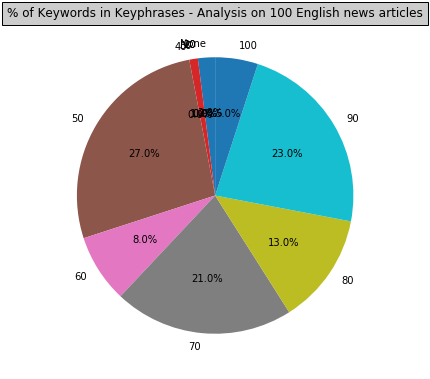

In [39]:
from pylab import *

# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = 'None', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100'

pie(count_scores, labels=labels, autopct='%1.1f%%', startangle=90)

title('% of Keywords in Keyphrases - Analysis on 100 English news articles', bbox={'facecolor':'0.8', 'pad':5})

show()

In [7]:
for i in data:
    if i['url'] == 'http://www.wsbtv.com/news/local/cobb-county/teen-stabbed-to-death-at-cobb-county-playground/651106228':
        print i['keywords']
        print i['keyphrases']
        print i['names_entities']

[[u'sign', 2.0], [u'account', 1.5], [u'profile', 1.0], [u'county', 1], [u'death', 1], [u'thank', 1.0], [u'please', 1.0], [u'click', 1.0], [u'playground', 1], [u'cobb', 1]]
[[u'click', 2], [u'thank registering', 2], [u'sign using', 2], [u'data_emailaddress please', 1], [u'please check', 1], [u'account loginwidget', 1], [u'update profile', 1], [u'receive latest', 1], [u'using wsbtv', 1], [u'welcome back', 1]]
[u'Cobb', u'County']


In [9]:
for i in data:
    print i['url']
    print i['names_entities']

http://abcnews.go.com/Health/wireStory/big-tobaccos-anti-smoking-ads-begin-decade-delay-51292806
[u'Big', u'Tobacco', u'Ruth', u'Malone', u'University', u'of', u'California', u'San', u'Francisco', u'American', u'Cancer', u'Society', u'Justice', u'Department', u'Bill', u'Clinton', u'U.S.', u'Altria', u'Group', u'Philip', u'Morris', u'USA', u'R.J.', u'Reynolds', u'Co.', u'British', u'Matthew', u'Myers', u'Campaign', u'for', u'Free', u'Kids', u'Lucy', u'Perry', u'Mason', u'Congress', u'Robin', u'Koval', u'Truth', u'Initiative', u'Nielsen', u'TV', u'Facebook', u'YouTube', u'Netflix', u'Ellie', u'Mixter-Keller', u'Wauwatosa', u'Wisconsin', u'Associated', u'Press', u'Carrie', u'Antlfinger']
http://www.wsbtv.com/news/local/cobb-county/teen-stabbed-to-death-at-cobb-county-playground/651106228
[u'Cobb', u'County']
http://www.tmz.com/2017/11/19/harrison-ford-helps-woman-crashed-car-off-highway/
[u'Harrison', u'Ford', u'Highway', u'Santa', u'Paula', u'California', u'TMZ']
http://www.newsweek.com/